In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/MyDrive/usdrub.csv', index_col='date', 
                 parse_dates=['date'])
df.head()

,open,high,low,close
date,,,,
1999-06-29,24.3000,24.350,24.200,24.2249
1999-06-30,24.2201,24.224,24.201,24.2100
1999-07-01,24.2100,24.220,24.202,24.2150
1999-07-02,24.2200,24.460,24.220,24.3500
1999-07-06,24.4000,24.550,24.300,24.4850


In [3]:
max_cl = df.close.max()
min_cl = df.close.min()
print(min_cl, max_cl)

23.0855 83.764


In [4]:
df['cl'] = (df.close - min_cl) / max_cl
df.cl.describe()

count    5323.000000
mean        0.211002
std         0.206289
min         0.000000
25%         0.064879
50%         0.095697
75%         0.430922
max         0.724398
Name: cl, dtype: float64

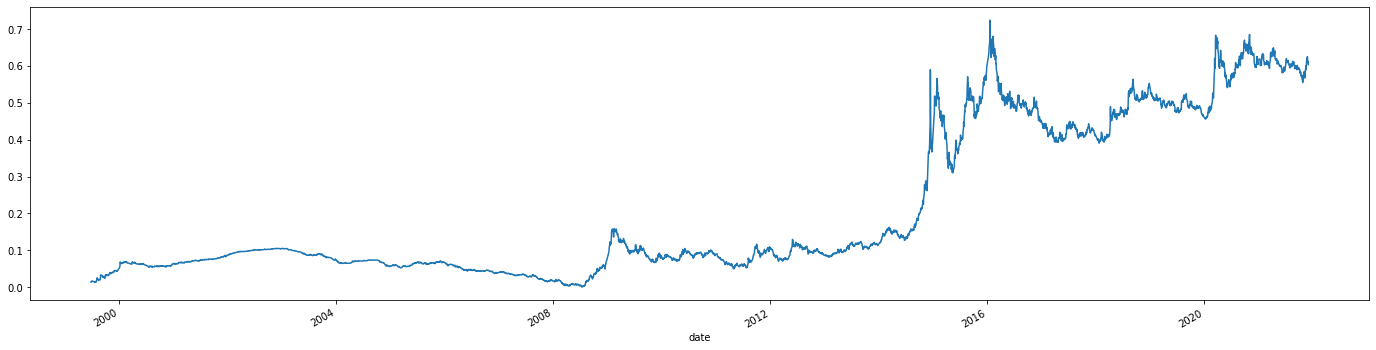

In [5]:
df.cl.plot(figsize=(24, 6))

In [6]:
df['result'] = df.close - df.open
df.result.describe()

count    5323.000000
mean        0.002567
std         0.358177
min        -5.060000
25%        -0.060000
50%        -0.000100
75%         0.057400
max        12.500000
Name: result, dtype: float64

In [7]:
df['positive'] = 1
df.loc[df.result < 0, 'positive'] = 0
df.positive.value_counts()

0    2675
1    2648
Name: positive, dtype: int64

In [8]:
df['volatility'] = df.high - df.low
df.volatility.describe()

count    5323.000000
mean        0.317250
std         0.572785
min         0.000500
25%         0.047450
50%         0.146000
75%         0.410000
max        22.037500
Name: volatility, dtype: float64

In [9]:
df['vol'] = df.volatility / df.high
df.vol.describe()

count    5323.000000
mean        0.006231
std         0.008432
min         0.000016
25%         0.001672
50%         0.004453
75%         0.007929
max         0.274782
Name: vol, dtype: float64

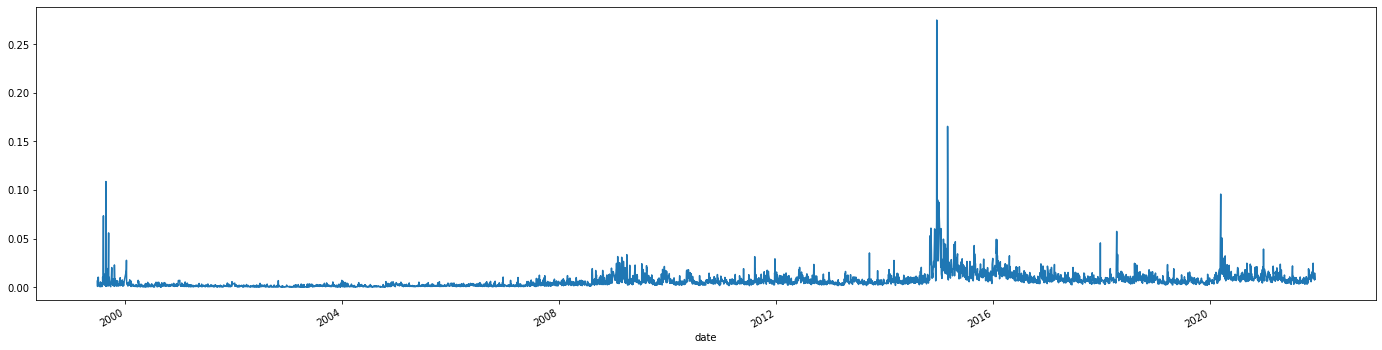

In [10]:
df.vol.plot(figsize=(24, 6))

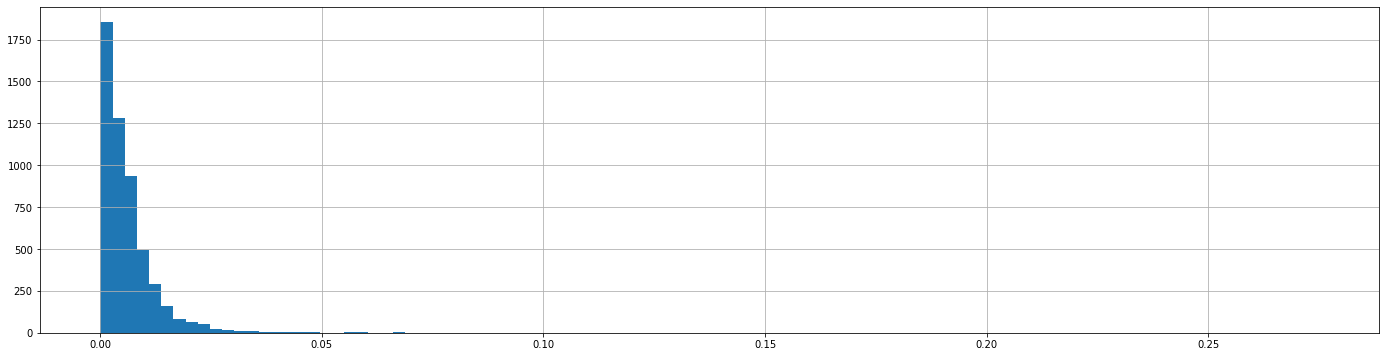

In [11]:
df.vol.hist(figsize=(24, 6), bins=100)

In [12]:
df['res'] = df.result.abs() / df.volatility
df.res.describe()

count    5323.000000
mean        0.488532
std         0.277138
min         0.000000
25%         0.259033
50%         0.493274
75%         0.714286
max         1.000000
Name: res, dtype: float64

In [13]:
df.corr()

,open,high,low,close,cl,result,positive,volatility,vol,res
open,1.000000,0.999749,0.999876,0.999785,0.999785,-0.000861,-0.033779,0.521131,0.408585,-0.078930
high,0.999749,1.000000,0.999602,0.999868,0.999868,0.015274,-0.028421,0.536984,0.424116,-0.077823
low,0.999876,0.999602,1.000000,0.999829,0.999829,0.007226,-0.029019,0.512973,0.399627,-0.079806
close,0.999785,0.999868,0.999829,1.000000,1.000000,0.019867,-0.024632,0.526184,0.412768,-0.078812
cl,0.999785,0.999868,0.999829,1.000000,1.000000,0.019867,-0.024632,0.526184,0.412768,-0.078812
result,-0.000861,0.015274,0.007226,0.019867,0.019867,1.000000,0.440963,0.248717,0.205680,0.004955
positive,-0.033779,-0.028421,-0.029019,-0.024632,-0.024632,0.440963,1.000000,0.002942,0.001985,-0.026248
volatility,0.521131,0.536984,0.512973,0.526184,0.526184,0.248717,0.002942,1.000000,0.955030,0.018437
vol,0.408585,0.424116,0.399627,0.412768,0.412768,0.205680,0.001985,0.955030,1.000000,0.045621
res,-0.078930,-0.077823,-0.079806,-0.078812,-0.078812,0.004955,-0.026248,0.018437,0.045621,1.000000


In [ ]:
df = df[['cl', 'positive', 'res', 'vol']]
df.to_csv('/content/drive/MyDrive/usdrub1.csv')